# Access data
- Go to https://appeears.earthdatacloud.nasa.gov/, And get the 16-day, 250m NDVI MODIS product. You can pick either Terra or Aqua satellite, I chose Terra.
- Subregion the area using a `.geojson` file, the contents of which are here:
```json
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "name": "PWWB defined LA Region Bounding Box"
      },
      "geometry": {
        "type": "Polygon",
        "coordinates": [[
          [-118.75, 33.5],
          [-118.75, 34.5],
          [-117.0, 34.5],
          [-117.0, 33.5],
          [-118.75, 33.5]
        ]]
      }
    }
  ]
}
```
- Put in your desired time range, and let it cook

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import cv2

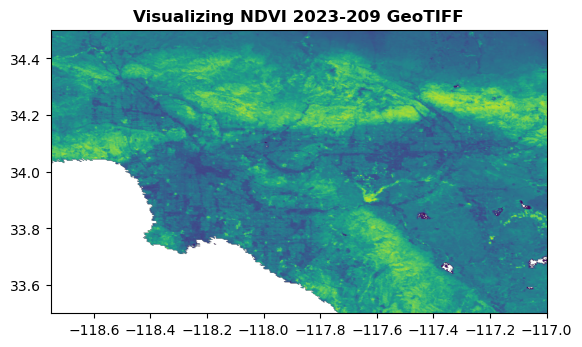

In [2]:
filedir = '/mnt/0CA6310DA630F932/two_years_raw_ndvi_data'
filepath = f'{filedir}/MOD13Q1.061__250m_16_days_NDVI_doy2023209000000_aid0001.tif'

# visualize as-is, read as numpy
with rasterio.open(filepath, 'r') as src:
    show(src, title="Visualizing NDVI 2023-209 GeoTIFF")
    ndvi = src.read()

Shape: (1, 481, 841)


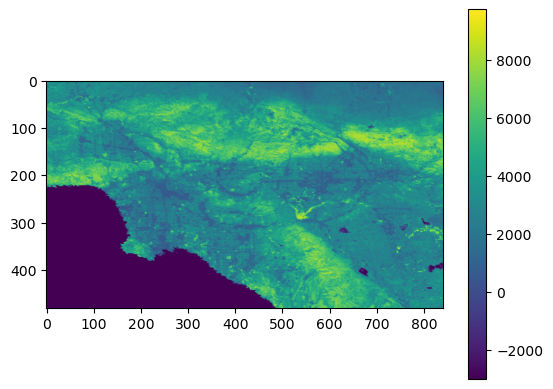

In [3]:
# visualize numpy
import matplotlib.pyplot as plt

print("Shape:", ndvi.shape)
ndvi = np.squeeze(ndvi)

fig, ax = plt.subplots()
im = ax.imshow(ndvi)
plt.colorbar(im, ax=ax)
plt.show()

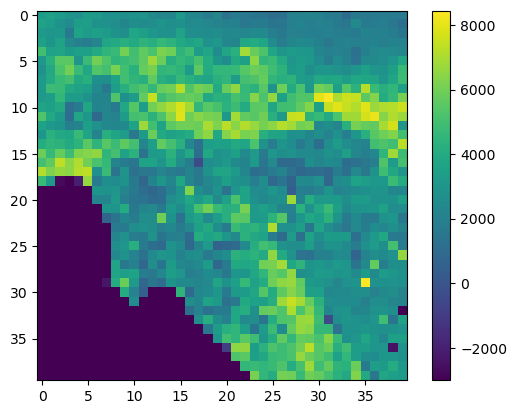

In [4]:
# visualize 40x40
ndvi = cv2.resize(ndvi, (40, 40))
fig, ax = plt.subplots()
im = ax.imshow(ndvi)
plt.colorbar(im, ax=ax)
plt.show()

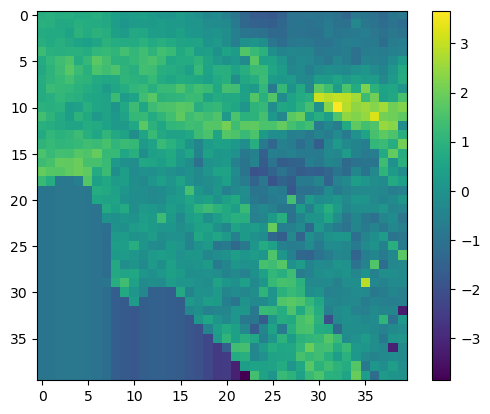

In [5]:
# visualize scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndvi = scaler.fit_transform(ndvi)

fig, ax = plt.subplots()
im = ax.imshow(ndvi)
plt.colorbar(im, ax=ax)
plt.show()